In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [17]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

# https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-09-01&end=2013-09-05
start = datetime.date(2019, 1, 1)
end = datetime.date(2021, 2, 21)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)

result.content

b'{"bpi":{"2019-01-01":3869.47,"2019-01-02":3941.2167,"2019-01-03":3832.155,"2019-01-04":3863.6267,"2019-01-05":3835.5983,"2019-01-06":4083.165,"2019-01-07":4041.4583,"2019-01-08":4029.9917,"2019-01-09":4028.2917,"2019-01-10":3669.5825,"2019-01-11":3660.9583,"2019-01-12":3658.6725,"2019-01-13":3540.1583,"2019-01-14":3706.1725,"2019-01-15":3604.1333,"2019-01-16":3630.2567,"2019-01-17":3665.41,"2019-01-18":3630.785,"2019-01-19":3708.9633,"2019-01-20":3552.8933,"2019-01-21":3548.69,"2019-01-22":3598.2183,"2019-01-23":3576.01,"2019-01-24":3598.2717,"2019-01-25":3582.2,"2019-01-26":3580.775,"2019-01-27":3553.0133,"2019-01-28":3454.48,"2019-01-29":3421.12,"2019-01-30":3482.3,"2019-01-31":3441.985,"2019-02-01":3468.2517,"2019-02-02":3466.2175,"2019-02-03":3443.1667,"2019-02-04":3451.115,"2019-02-05":3472.035,"2019-02-06":3393.6717,"2019-02-07":3385.97,"2019-02-08":3657.4017,"2019-02-09":3654.3,"2019-02-10":3681.0517,"2019-02-11":3621.0283,"2019-02-12":3622.7133,"2019-02-13":3605.3133,"2019-02

In [18]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)

In [19]:
data

,bpi
date,
2019-01-01,3869.4700
2019-01-02,3941.2167
2019-01-03,3832.1550
2019-01-04,3863.6267
2019-01-05,3835.5983
...,...
2021-02-17,52127.3200
2021-02-18,51573.4067
2021-02-19,55923.1300


<AxesSubplot:xlabel='date'>

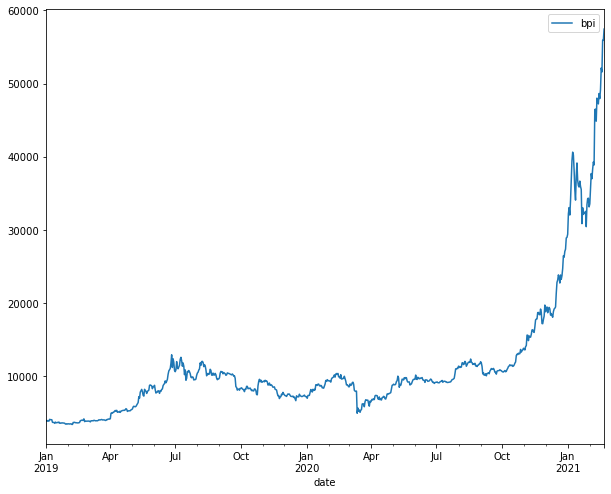

In [20]:
data.plot()

<AxesSubplot:xlabel='date'>

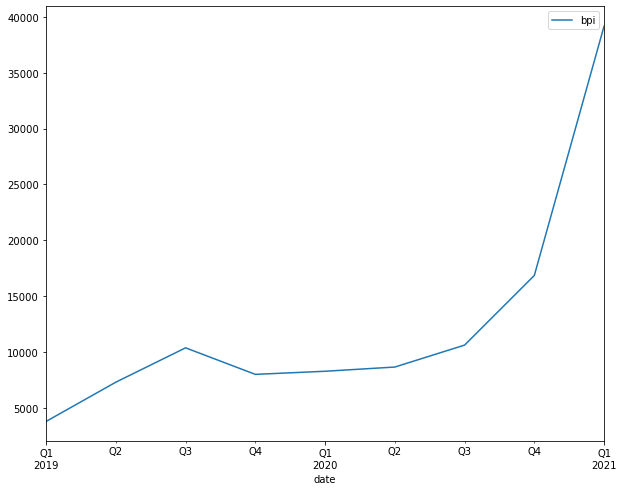

In [21]:
data.resample('Q').mean().plot()

<AxesSubplot:xlabel='date'>

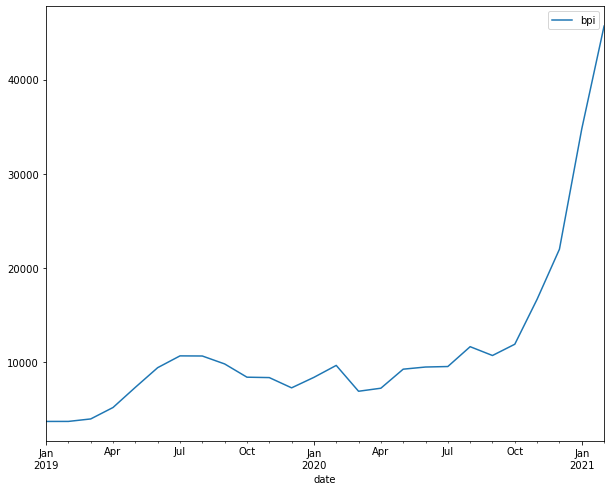

In [23]:
data.resample('M').mean().plot()

In [25]:
data[:5].diff()

,bpi
date,
2019-01-01,NaN
2019-01-02,71.7467
2019-01-03,-109.0617
2019-01-04,31.4717
2019-01-05,-28.0284


In [26]:
data[:5].diff(2)

,bpi
date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,-37.3150
2019-01-04,-77.5900
2019-01-05,3.4433


<AxesSubplot:xlabel='date'>

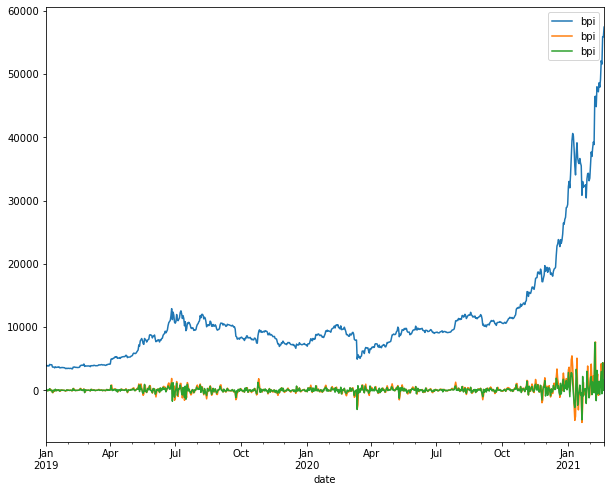

In [27]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis = 1).plot()

In [28]:
data[:5].shift()

,bpi
date,
2019-01-01,NaN
2019-01-02,3869.4700
2019-01-03,3941.2167
2019-01-04,3832.1550
2019-01-05,3863.6267


In [29]:
data[:5].tshift()

<ipython-input-29-1eebd7bced17>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data[:5].tshift()


,bpi
date,
2019-01-02,3869.4700
2019-01-03,3941.2167
2019-01-04,3832.1550
2019-01-05,3863.6267
2019-01-06,3835.5983


In [31]:
data[:5] - data[:5].shift()

,bpi
date,
2019-01-01,NaN
2019-01-02,71.7467
2019-01-03,-109.0617
2019-01-04,31.4717
2019-01-05,-28.0284


<ipython-input-32-47ed0a7a0026>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data, data - data.shift(), data.tshift(365)], axis = 1).plot()


<AxesSubplot:xlabel='date'>

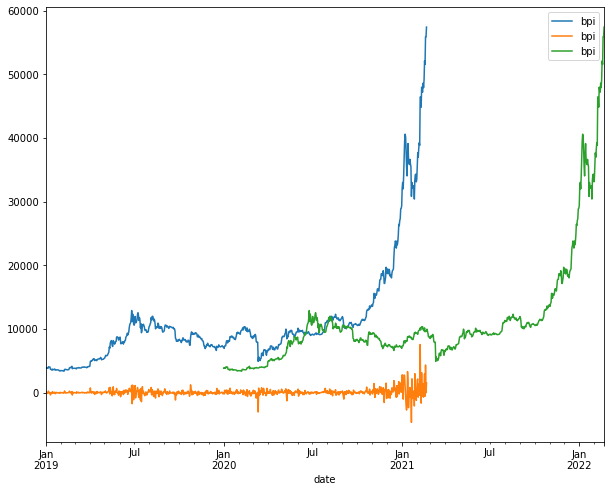

In [32]:
pd.concat([data, data - data.shift(), data.tshift(365)], axis = 1).plot()

<AxesSubplot:xlabel='date'>

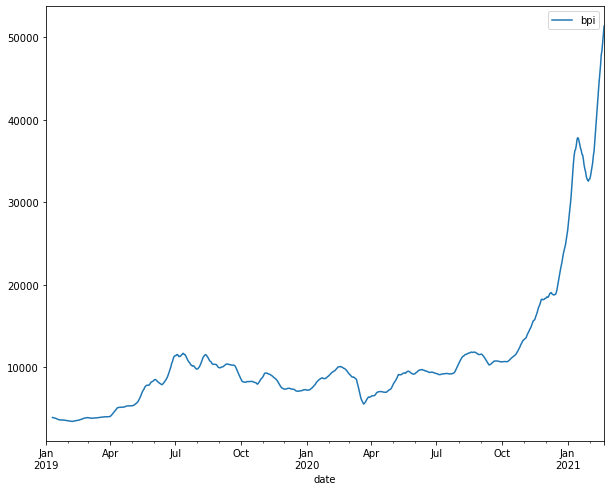

In [33]:
data.rolling(window = 10).mean().plot()

<AxesSubplot:xlabel='date'>

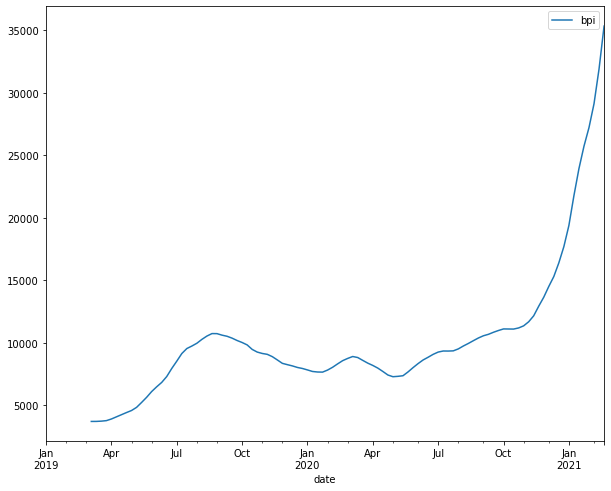

In [34]:
data.resample('W').mean().rolling(window = 10).mean().plot()

<AxesSubplot:xlabel='date'>

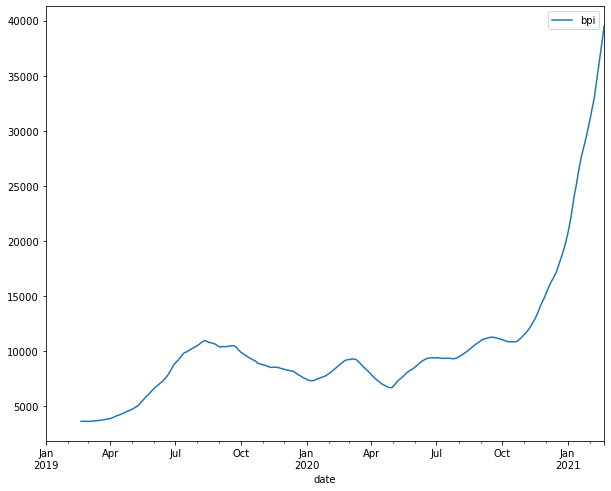

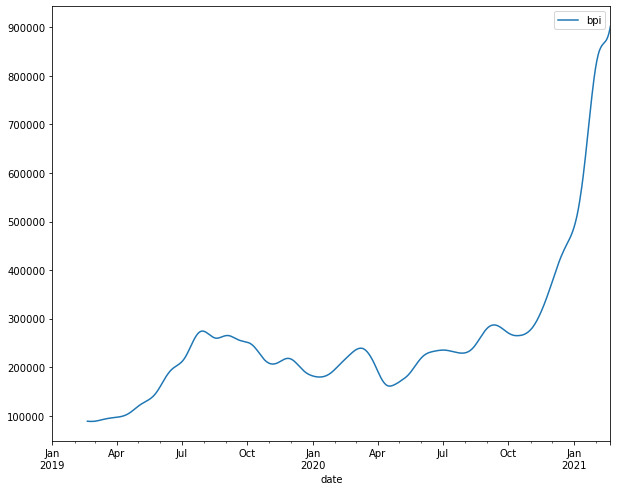

In [35]:
data.rolling(window = 50).mean().plot()
data.rolling(window = 50, win_type = 'gaussian').sum(std = 10).plot()

<AxesSubplot:xlabel='date'>

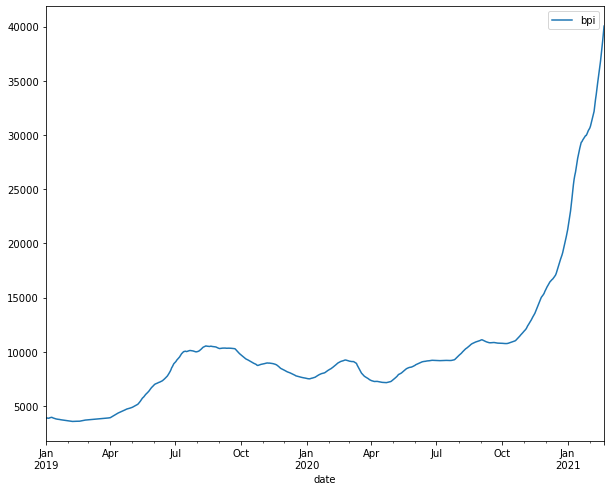

In [36]:
data.ewm(span = 50).mean().plot()